In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import seaborn as sns
from matplotlib import pyplot as plt
import statsmodels.api as sm
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs


import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
import numpy as np

from sklearn.metrics import r2_score 

from sklearn.model_selection import train_test_split


## Data Cleaning and Processing

In [29]:
buccs = pd.read_csv("BuccsDataComplete.csv")
buccs.drop(buccs.tail(1).index,inplace=True)

buccs.shape

(51, 18)

In [30]:
# check for nulls
buccs.isnull().sum()

TeamScore         0
Week              0
OppScore          0
1stD Offense      0
TotYd  Offense    0
PassY Offense     0
RushY Offense     0
TO Offense        0
1stD Defense      0
TotYd Defense     0
PassY Defense     0
RushY Defense     0
TO Defense        0
Offense           0
Defense           0
Sp. Tms           0
Season            0
Game              0
dtype: int64

## Feature Selection (1)

In [35]:
X = buccs.iloc[:,2:17]
y = buccs.TeamScore
X.shape

(51, 15)

In [34]:
X.head()

,OppScore,1stD Offense,TotYd Offense,PassY Offense,RushY Offense,TO Offense,1stD Defense,TotYd Defense,PassY Defense,RushY Defense,TO Defense,Offense,Defense,Sp. Tms,Season
0,40.0,26.0,529.0,417.0,112.0,0.0,26.0,475.0,432.0,43.0,2.0,29.69,-19.83,-4.90,2018.0
1,21.0,18.0,436.0,393.0,43.0,2.0,24.0,412.0,321.0,91.0,2.0,10.11,-5.14,1.42,2018.0
2,30.0,28.0,455.0,392.0,63.0,4.0,22.0,413.0,335.0,78.0,1.0,3.18,-9.86,2.73,2018.0
3,48.0,16.0,311.0,251.0,60.0,3.0,28.0,483.0,344.0,139.0,0.0,-5.14,-33.53,0.24,2018.0
4,34.0,30.0,510.0,389.0,121.0,2.0,26.0,417.0,347.0,70.0,0.0,22.99,-21.03,-2.24,2018.0


In [36]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs

clf = LinearRegression()

# Build step forward feature selection
sfs1 = sfs(clf,k_features = 15,forward=True,floating=False,scoring='neg_mean_squared_error',cv=5)

# Perform SFFS
sfs1 = sfs1.fit(X, y)




In [37]:
#sfs1.subsets_


In [38]:
sfs1.k_feature_names_


('OppScore',
 '1stD Offense',
 'TotYd  Offense',
 'PassY Offense',
 'RushY Offense',
 'TO Offense',
 '1stD Defense',
 'TotYd Defense',
 'PassY Defense',
 'RushY Defense',
 'TO Defense',
 'Offense',
 'Defense',
 'Sp. Tms',
 'Season')

In [39]:
#from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
#import matplotlib.pyplot as plt

#fig1 = plot_sfs(sfs1.get_metric_dict(), kind='std_dev')

#plt.title('Sequential Forward Selection (w. StdDev)')
#plt.grid()
#plt.show()

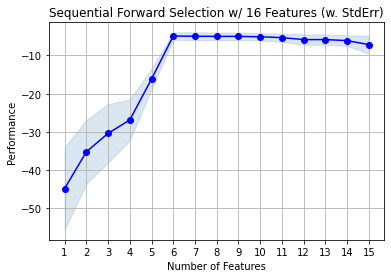

No of features= 5
[1, 10, 11, 12, 13]
Features selected in forward fit
Index(['1stD Offense', 'TO Defense', 'Offense', 'Defense', 'Sp. Tms'], dtype='object')


In [40]:
fig1 = plot_sfs(sfs1.get_metric_dict(), kind='std_err')
plt.title('Sequential Forward Selection w/ 16 Features (w. StdErr)')
plt.grid()
plt.show()

print ("No of features=",idx)
#Get the features indices for the best forward fit and convert to list
b=list(a[idx]['feature_idx'])
print(b)
# Index the column names. 
# Features from forward fit
print("Features selected in forward fit")
print(X.columns[b])



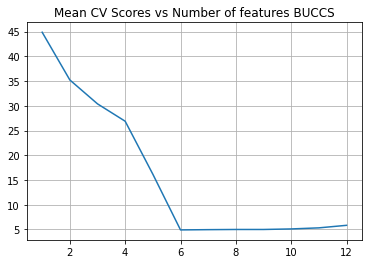

No of features= 5
[0, 9, 10, 11, 12]
Features selected in forward fit
Index(['OppScore', 'RushY Defense', 'TO Defense', 'Offense', 'Defense'], dtype='object')


In [41]:
# https://www.r-bloggers.com/2017/10/practical-machine-learning-with-r-and-python-part-3/
a=sfs1.get_metric_dict()
n=[]
o=[]
# Compute the mean cross validation scores
for i in np.arange(1,13):
    n.append(-np.mean(a[i]['cv_scores']))  
    
m=np.arange(1,13)

# Get the index of the minimum CV score
# Plot the CV scores vs the number of features
fig1=plt.plot(m,n)
fig1=plt.title('Mean CV Scores vs Number of features BUCCS')
fig1.figure.savefig('fig1.png', bbox_inches='tight')
plt.grid()
plt.show()


#print(pd.DataFrame.from_dict(sfs1.get_metric_dict(confidence_interval=0.90)).T)
idx = np.argmin(n)

print ("No of features=",idx)
#Get the features indices for the best forward fit and convert to list
b=list(a[idx]['feature_idx'])
print(b)
# Index the column names. 
# Features from forward fit
print("Features selected in forward fit")
print(X.columns[b])

# the table shows avgs for features, 10 fold CV errors
# the graph shows us that at 6 features we have the kowers mean CV error

### ETS for X inputs

In [42]:
#corr = TB.corr()
#g = sns.heatmap(corr,  vmax=.3, center=0,
            #square=True, linewidths=1, cbar_kws={"shrink": .5}, annot=True, fmt='.2f', cmap='PuOr')
#sns.despine()
#g.figure.set_size_inches(10,10)
    
#plt.show()

In [43]:
X_LR = X.iloc[:,[0, 9, 10, 11, 12]]
y_LR = y
#X_LR

In [44]:
etspred_TB = pd.DataFrame()

for i in X_LR:
    X = X_LR[i]
    model = SimpleExpSmoothing(np.asarray(X))
    fit = model.fit()
    fit = fit.forecast(1)
    etspred_TB[i] = fit

for i in etspred_TB:
    etspred_TB[i] = round(etspred_TB[i])
    

    

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


In [46]:
etspred_TB['Week'] = 21
etspred_TB = etspred_TB[[ 'Week', 'OppScore', 'RushY Defense', 'TO Defense', 'Offense', 'Defense']]
etspred_TB

,Week,OppScore,RushY Defense,TO Defense,Offense,Defense
0,21,23.0,87.0,2.0,8.0,-2.0


### Main Model, Tampa Bay Buccaneers

### Linear Regression (1)

In [47]:
# want to reinclude week in the regression
X = buccs.iloc[:,1:17]
X_LR = X.iloc[:,[0, 1 ,10, 11, 12, 13]]
y_LR = y

In [48]:
# create 80% training 20% testing sets do not randomize splits
X_train, X_test, y_train, y_test = train_test_split(
         X_LR, y_LR, test_size=0.20, random_state=1, shuffle = False)

In [49]:
model = sm.OLS(y_train,X_train).fit()
predictions = model.predict(X_test)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              TeamScore   R-squared (uncentered):                   0.985
Model:                            OLS   Adj. R-squared (uncentered):              0.982
Method:                 Least Squares   F-statistic:                              375.2
Date:                Sat, 06 Feb 2021   Prob (F-statistic):                    1.43e-29
Time:                        10:41:05   Log-Likelihood:                         -107.73
No. Observations:                  40   AIC:                                      227.5
Df Residuals:                      34   BIC:                                      237.6
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Week             -0.0933      0.139     -0.672      0.506      -0.376       0.189
OppScore          0.7986      0.054     14.850      0.000       0.689       0.908
RushY Defense     0.0007      0.015      0.047      0.963      -0.029       0.031
TO Defense        2.2738      0.605      3.755      0.001       1.043       3.504
Offense           0.8293      0.062     13.365      0.000       0.703       0.955
Defense           0.5908      0.083      7.125      0.000       0.422       0.759
==============================================================================
Omnibus:                        7.200   Durbin-Watson:                   1.724
Prob(Omnibus):                  0.027   Jarque-Bera (JB):                5.886
Skew:                          -0.850   Prob(JB):                       0.0527
Kurtosis:                       3.800   Cond. No.                         106.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [56]:
from sklearn.metrics import mean_squared_error  
from sklearn.metrics import r2_score


# Calculation of Mean Squared Error (MSE) 
print("MSE: ", mean_squared_error(y_test, predictions) )


def MAPE(Y_actual,Y_Predicted):
    mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
    return mape

print("MAPE: ", MAPE(y_test, predictions))

print("R_2: ", r2_score(y_test, predictions))

MSE:  10.746688493262514
MAPE:  27.490180531165876
R_2:  0.9240538892836839


## Final Prediction, Buccs

In [57]:
final_score = model.predict(etspred_TB)
round(final_score)

0    26.0
dtype: float64